# Analysis 2

## -- Pre-Processing --

Imports: 

In [4]:
import pandas as pd

1. Generate pp3.csv \
\
Columns Kept: ['points', 'settlement1', 'settlement2', 'production'] \
Columns Added: ['win'] \
Filters: Contains only data with harbor settlement

2. Generate pp4.csv \
\
Columns Kept: ['points', 'settlement1', 'settlement2', 'production'] \
Columns Added: ['win'] \
Filters: Contains only data without harbor settlement (Dessert are not included)

In [13]:
def pp3():
    # Load Dataframe
    df = pd.read_csv('catanstats.csv')

    # Remove Unwanted Features
    drop = ['gameNum', 'player', 'me', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        'tradeGain', 'robberCardsGain', 'totalGain', 'tradeLoss', 'robberCardsLoss',
        'tribute', 'totalLoss', 'totalAvailable']
    df.drop(drop, axis=1, inplace=True)

    # Add Columns
    df['win'] = df['points'].apply(lambda x: 1 if x >= 10 else 0)

    # Apply Filters
    df = df[((df['Unnamed: 19'] == 0) & (df['Unnamed: 20'] != 'D')) | ((df['Unnamed: 25'] == 0) & (df['Unnamed: 26'] != 'D') & (df['Unnamed: 26'] != 'B'))]

    df.to_csv('pp3.csv', index=False)

In [15]:
def pp4():
    # Load Dataframe
    df = pd.read_csv('catanstats.csv')

    # Remove Unwanted Features
    drop = ['gameNum', 'player', 'me', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        'tradeGain', 'robberCardsGain', 'totalGain', 'tradeLoss', 'robberCardsLoss',
        'tribute', 'totalLoss', 'totalAvailable']
    df.drop(drop, axis=1, inplace=True)

    # Add Columns
    df['win'] = df['points'].apply(lambda x: 1 if x >= 10 else 0)

    # Apply Filters
    df = df[(df['Unnamed: 19'] != 0) & (df['Unnamed: 25'] != 0)]

    df.to_csv('pp4.csv', index=False)

In [16]:
pp3()
pp4()

PP3 & PP4: Contain data for visual analysis

## -- Data Visualization --

Comparing average points, win rate, and average productions

Imports: 

In [17]:
import matplotlib.pyplot as plt

1. Load datas into dataframes

In [21]:
df_harbor = pd.read_csv('pp3.csv')
df_notHarbor = pd.read_csv('pp4.csv')

2. Calculating values of interest

In [22]:
# Average Points
hPoints = df_harbor.mean(numeric_only=True)['points']
nhPoints = df_notHarbor.mean(numeric_only=True)['points']
# Winning Percentage
hWin = df_harbor.mean(numeric_only=True)['win']
nhWin = df_notHarbor.mean(numeric_only=True)['win']
# Average Production
hProd = df_harbor.mean(numeric_only=True)['production']
nhProd = df_notHarbor.mean(numeric_only=True)['production']

# Prints
print('HARBOR')
print('average points: ' + (str)(hPoints))
print('winning percentage: ' + (str)(hWin))
print('average production: ' + (str)(hProd))

print()
print('NOT HARBOR')
print('average points: ' + (str)(nhPoints))
print('winning percentage: ' + (str)(nhWin))
print('average production: ' + (str)(nhProd))

HARBOR
average points: 6.735294117647059
winning percentage: 0.17647058823529413
average production: 45.794117647058826

NOT HARBOR
average points: 7.409090909090909
winning percentage: 0.2662337662337662
average production: 53.58441558441559


3. Graphing values of interest

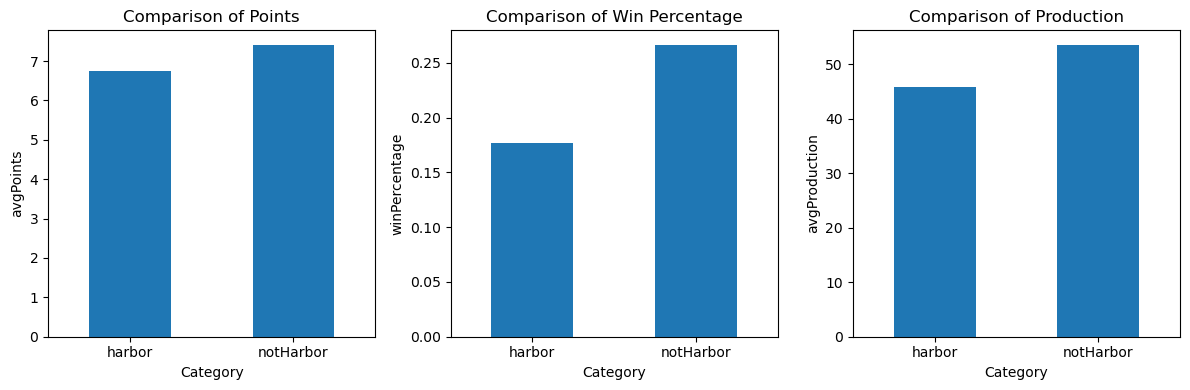

In [23]:
# Create a dataframe
graph = pd.DataFrame({'category': ['harbor', 'notHarbor'],
                    'avgPoints': [hPoints, nhPoints],
                    'winPercentage': [hWin, nhWin],
                    'avgProduction': [hProd, nhProd]})

# Create a subplot grid
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot on a separate subplot
graph.plot(kind='bar', x='category', y='avgPoints', rot=0, ax=axs[0], legend=False)
graph.plot(kind='bar', x='category', y='winPercentage', rot=0, ax=axs[1], legend=False)
graph.plot(kind='bar', x='category', y='avgProduction', rot=0, ax=axs[2], legend=False)

# Set the plot title and axis labels for each subplot
axs[0].set_title("Comparison of Points")
axs[0].set_xlabel("Category")
axs[0].set_ylabel("avgPoints")
axs[1].set_title("Comparison of Win Percentage")
axs[1].set_xlabel("Category")
axs[1].set_ylabel("winPercentage")
axs[2].set_title("Comparison of Production")
axs[2].set_xlabel("Category")
axs[2].set_ylabel("avgProduction")


# Adjust the layout and spacing of subplots
plt.tight_layout()

# Display the plot
plt.show()